In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Button, Slider

In [23]:
class Spectral2D:
    def __init__(self, Lx, Ly, number_of_points_x, number_of_points_y, k_0):
        self.Lx = Lx
        self.Ly = Ly
        self.number_of_points_x = number_of_points_x
        self.number_of_points_y = number_of_points_y
        self.k_0 = k_0
        

        self.x_grid = np.linspace(-10*Lx, 10*Lx, number_of_points_x, endpoint=False)
        self.y_grid = np.linspace(-10*Ly, 10*Ly, number_of_points_y, endpoint=False)
        self.kx_grid = 2 * np.pi * np.fft.fftfreq(number_of_points_x, d=20*Lx/number_of_points_x)
        self.ky_grid = 2 * np.pi * np.fft.fftfreq(number_of_points_y, d=20*Ly/number_of_points_y)
        

        self.X, self.Y = np.meshgrid(self.x_grid, self.y_grid)
        self.Kx, self.Ky = np.meshgrid(self.kx_grid, self.ky_grid)
        
       
        self.D = 1j / (2 * k_0)
        self.epsilon = None
        
    def initialize(self, function):
        self.epsilon = function
        
    def step(self, dz):
        if self.epsilon is None:
            raise ValueError("Initialize epsilon before stepping.")
        
        epsilon_hat = np.fft.fft2(self.epsilon)
        
        epsilon_hat *= np.exp(-self.D * (self.Kx**2 + self.Ky**2) * dz)
        
        self.epsilon = np.fft.ifft2(epsilon_hat)
        
        return self.epsilon


In [24]:
def advance(spectral, Z, N):
    dz = Z / N
    epsilon_evolution = []
    for _ in range(N):
        epsilon_evolution.append(spectral.step(dz))
    return np.array(epsilon_evolution)

In [29]:
def exponential(spectral):
    return np.exp(-spectral.X**2/(spectral.Lx/2)**2 - spectral.Y**2/(spectral.Ly/2)**2)

In [33]:
#Example

Lx = 0.1
Ly = 0.1
number_of_points_x = 256
number_of_points_y = 256
k_0 =  2*np.pi/635 *10**9 
Z = 10**5
N = 100 

spectral = Spectral2D(Lx, Ly, number_of_points_x, number_of_points_y, k_0)

spectral.initialize(exponential(spectral))

epsilon_evolution = advance(spectral, Z, N)


In [ ]:
# needs to be done.
def analytical_solution()

<IPython.core.display.Javascript object>


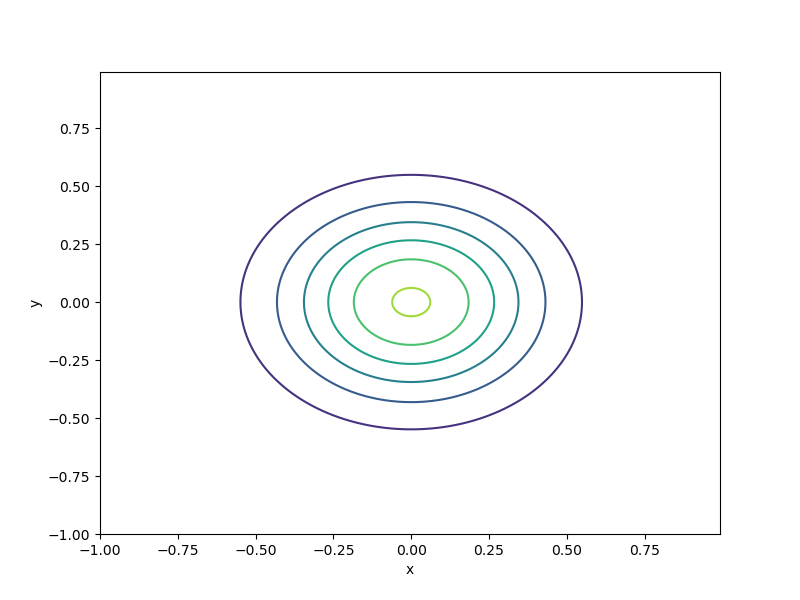

/var/folders/w7/3p3dw0tj57ggm87qfh14d7540000gn/T/ipykernel_32769/2638146477.py:3: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(spectral.X, spectral.Y, abs(epsilon_evolution[-1]), label='final')


In [35]:

plt.figure(figsize=(8, 6))
#plt.contour(spectral.X, spectral.Y, abs(epsilon_evolution[0]), label='initial')
plt.contour(spectral.X, spectral.Y, abs(epsilon_evolution[-1]), label='final')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<IPython.core.display.Javascript object>


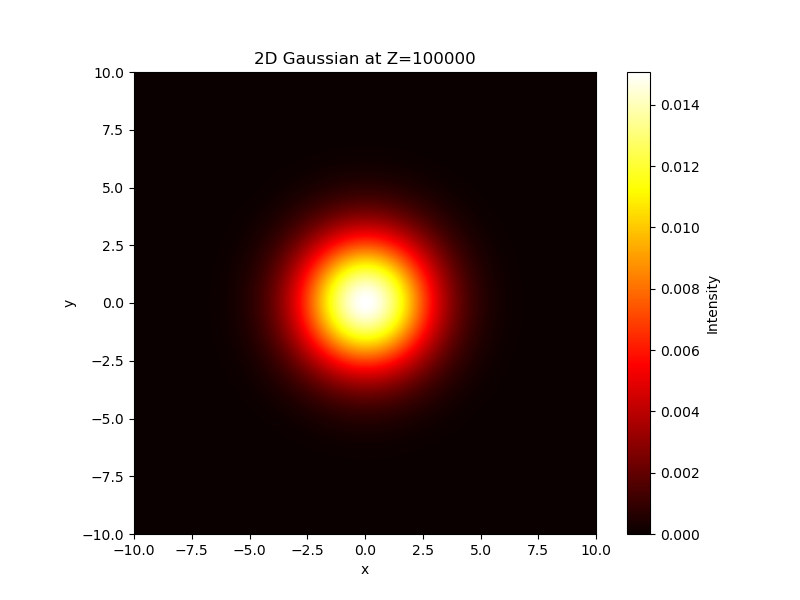

In [15]:
# imshow of the gaussian at z
plt.figure(figsize=(8, 6))
plt.imshow(np.abs(epsilon_evolution[-1])**2, extent=[-10, 10, -10, 10], cmap='hot', origin='lower')
plt.colorbar(label='Intensity')
plt.title('2D Gaussian at Z={}'.format(Z))
plt.xlabel('x')
plt.ylabel('y')
plt.show()